# CHAPITER I : Exploratory Data Analysis

## 1) Importing the necessary libraries

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2) Data importation

In [121]:
data=pd.read_csv('Water_quality_and_potability/dataset/water_potability.csv')
new_data=data.copy()
new_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## 3) Basic analysis

### Data shape

In [122]:
new_data.shape

(3276, 10)

### Data description

In [123]:
new_data.describe(include='all')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Data information

In [124]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Counting the number of the quantitative variable and the number of the qualitative variable

In [125]:
new_data.dtypes.value_counts()

float64    9
int64      1
Name: count, dtype: int64

### NaN analysis

In [126]:
# chech the missing values each variables
#new_data.isnull().sum()
new_data.isnull().sum()/new_data.shape[0]

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

### Visualization of the categorical variable

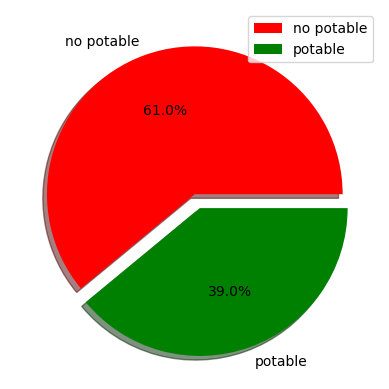

In [127]:
potability=new_data['Potability'].value_counts(normalize=True)*100
plt.pie(potability, 
        labels=['no potable', 'potable'],
        colors = ['red', 'green'],
        explode = [0, 0.1],
        autopct = '%1.1f%%',
        shadow = True)
plt.legend()

### Visualization of the quantitative variable

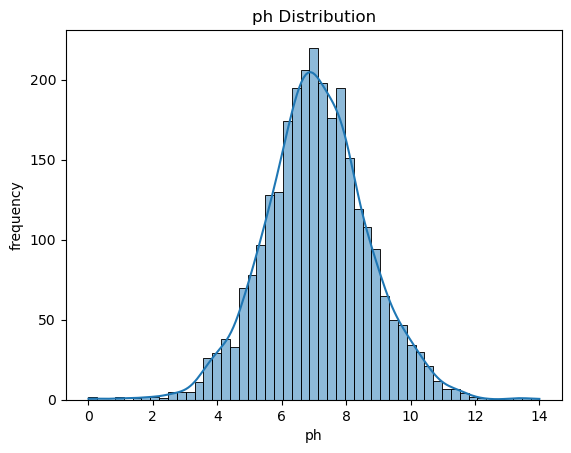

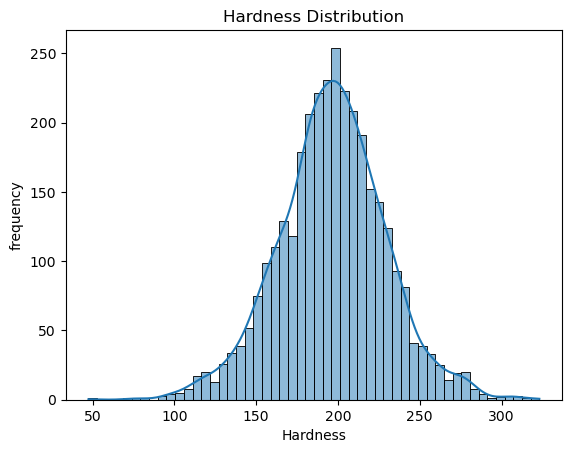

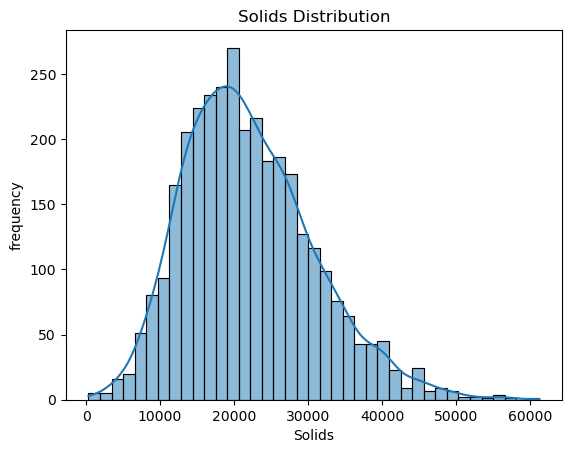

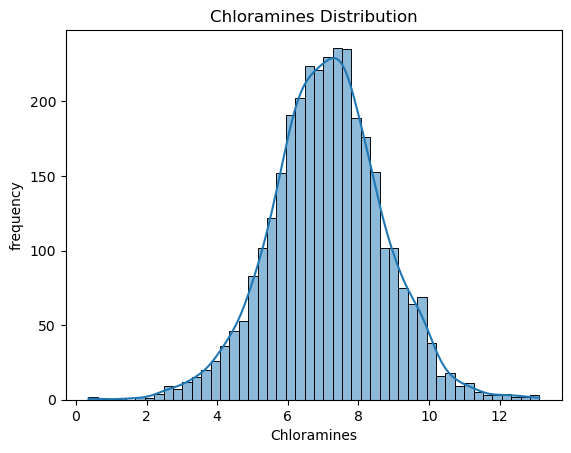

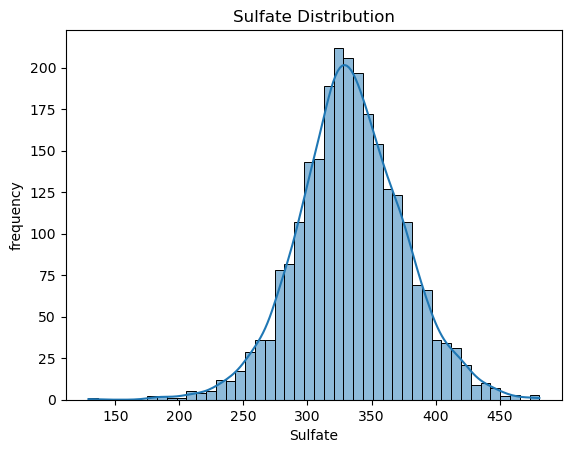

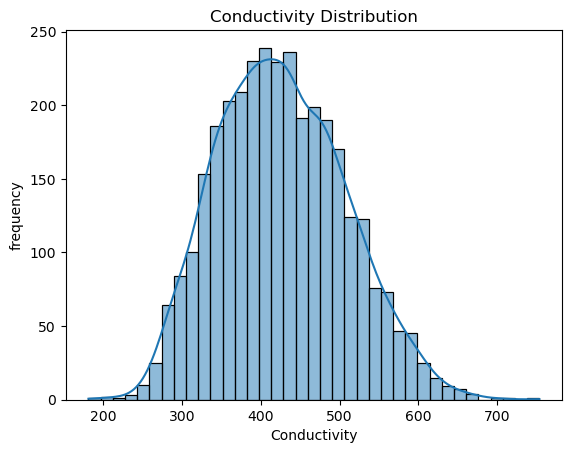

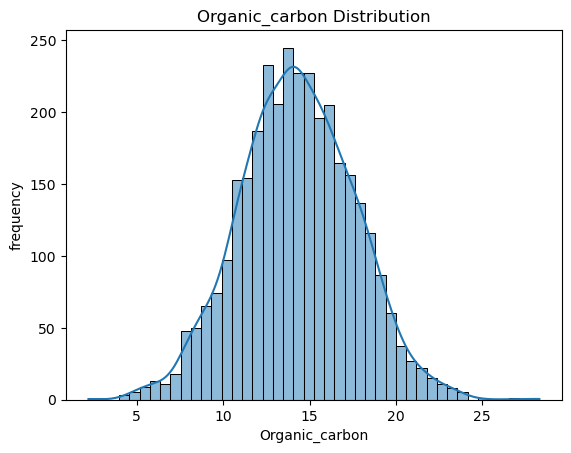

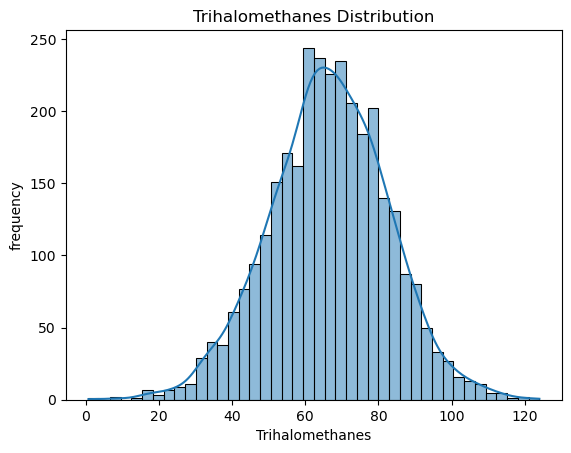

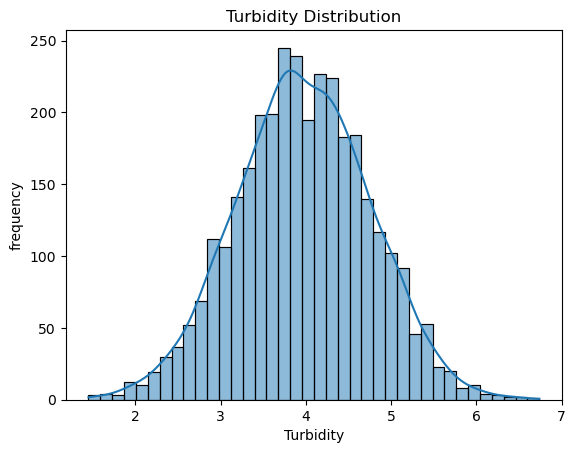

In [128]:
#ignore the specific warning message
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")
#new_data.replace([np.inf, -np.inf], np.nan, inplace=True)

#Visualization of the quantitative variable
for col in new_data.columns:
    if new_data[col].dtypes==float:
        plt.figure()
        sns.histplot(new_data[col],kde=True)
        plt.title('{} Distribution'.format(col))
        plt.xlabel(col)
        plt.ylabel('frequency')


### Visualizing the relationship between variables

In [129]:
#RELATION BETWEEN OF THE VARIABLE FEATURES
#Correlation matrix of the features variables
data_corr=new_data.iloc[:,:-1].corr()
data_corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

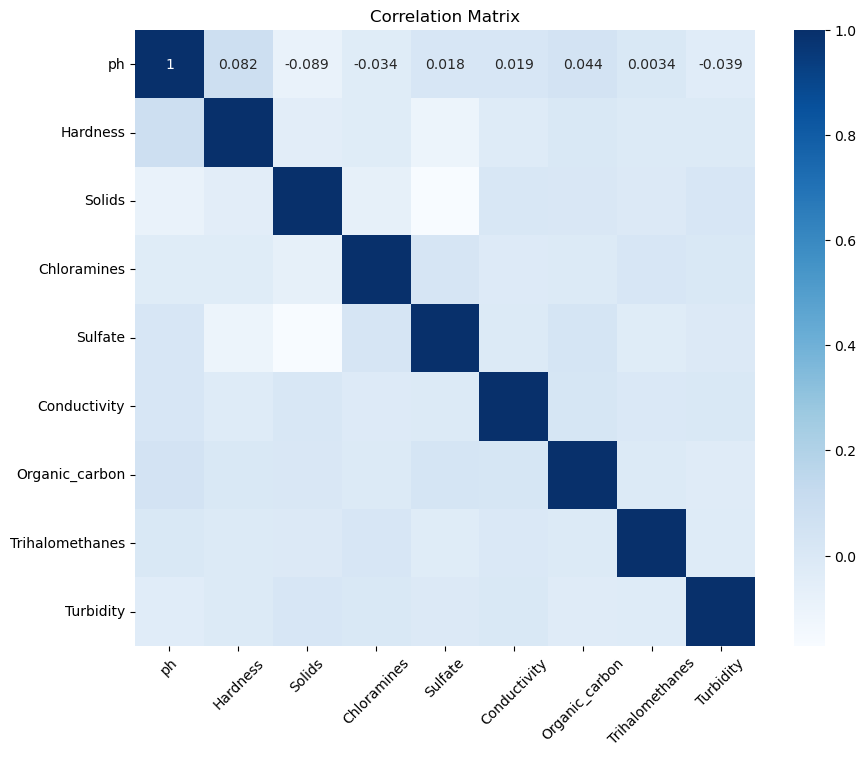

In [130]:
#Correlation matrix visualisation
plt.figure(figsize=(10,8))
sns.heatmap(data_corr, cmap='Blues',annot=True)
plt.xticks(rotation=45)
plt.title('Correlation Matrix')

In [131]:
#Setting so that the result is displayed in a single line
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

#RELATION BETWEEN OF THE VARIABLE FEATURES AND THE VARIABLE TARGET
print(new_data.groupby('Potability').count())
print(new_data.groupby('Potability').min())
print(new_data.groupby('Potability').mean())
print(new_data.groupby('Potability').max())
print(new_data.groupby('Potability').std())

              ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  Organic_carbon  Trihalomethanes  Turbidity
Potability                                                                                                        
0           1684      1998    1998         1998     1510          1998            1998             1891       1998
1           1101      1278    1278         1278      985          1278            1278             1223       1278
                  ph   Hardness      Solids  Chloramines     Sulfate  Conductivity  Organic_carbon  Trihalomethanes  Turbidity
Potability                                                                                                                    
0           0.000000  98.452931  320.942611     1.683993  203.444521    181.483754        4.371899         0.738000   1.450000
1           0.227499  47.432000  728.750830     0.352000  129.000000    201.619737        2.200000         8.175876   1.492207
                  ph    Hardness

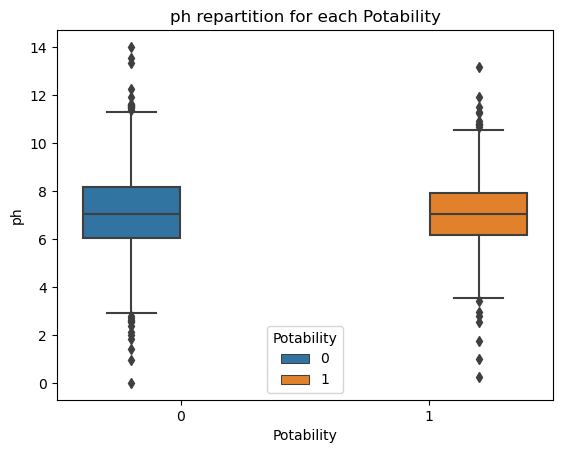

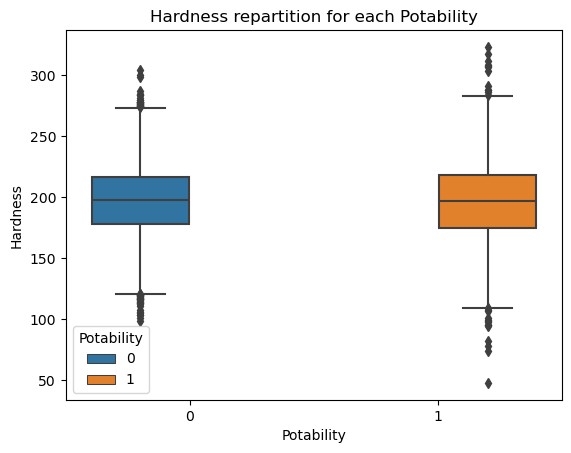

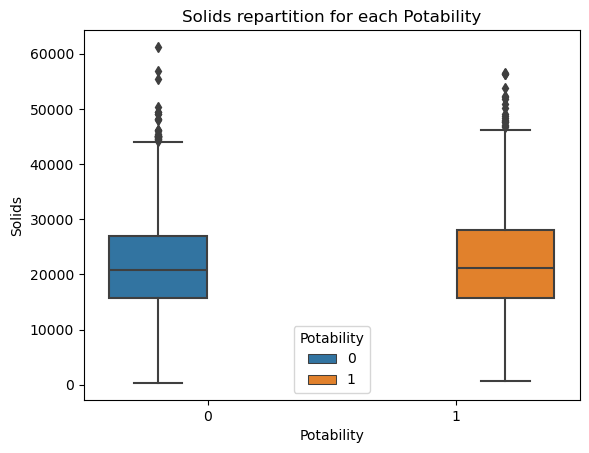

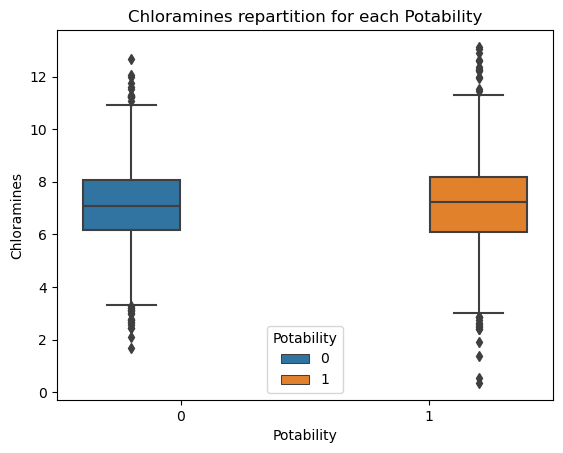

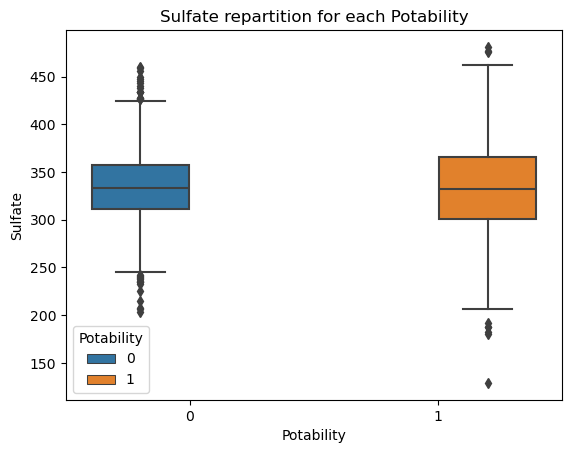

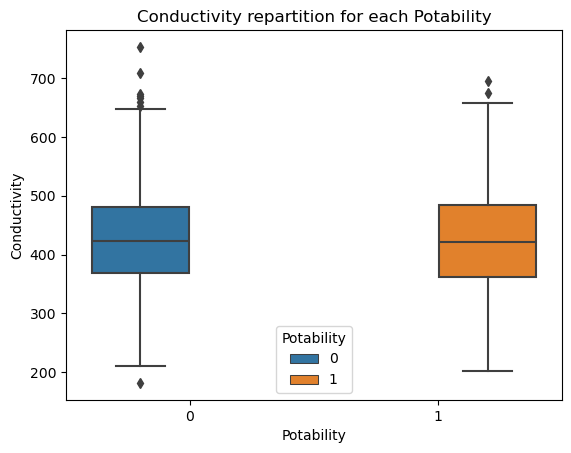

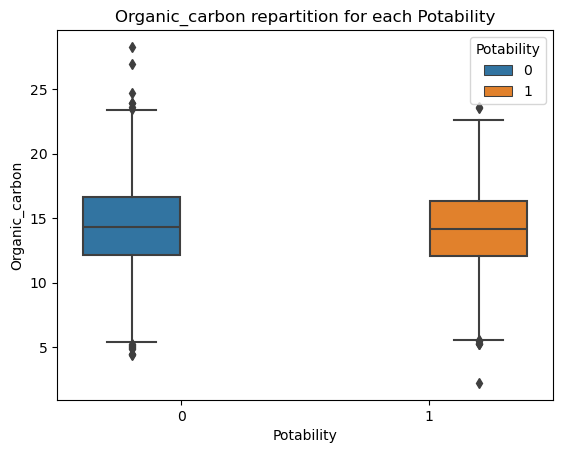

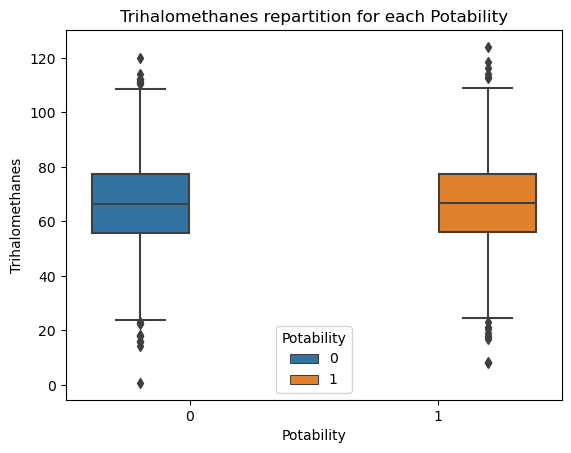

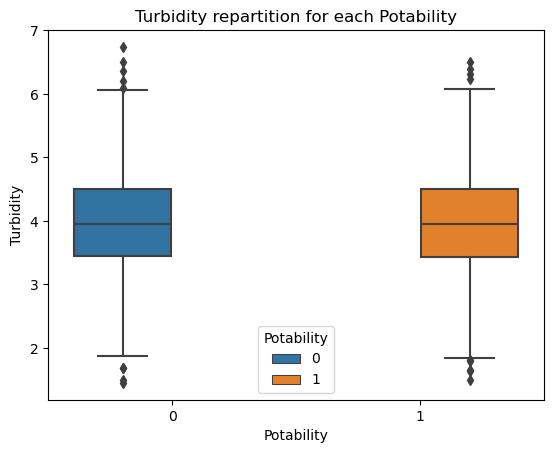

In [132]:
#Visualization
for col in new_data.columns:
    if col!='Potability':
        plt.figure()
        sns.boxplot(new_data,x='Potability', y=col, hue="Potability")
        plt.title("{} repartition for each Potability".format(col))

# CHAPITER II: Machine Learning

## 1) Importing the necessary libraries

In [133]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, chi2, f_classif, VarianceThreshold
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

## 2) Pre-processing

### Loading data

In [134]:
df = data.copy()
#df=df.dropna(axis=0)

### Data cleaning

In [135]:
def outliers_cleaning(data):
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data_cleaned

In [136]:
# outliers cleaning
df=outliers_cleaning(df)

###  TrainTest

In [137]:
trainset, testset = train_test_split(df , test_size=0.2, random_state=0)
#Checking the proportion of classes in the target variable
print(trainset['Potability'].value_counts(normalize=True))
print(testset['Potability'].value_counts(normalize=True))

Potability
0    0.605344
1    0.394656
Name: proportion, dtype: float64
Potability
0    0.628049
1    0.371951
Name: proportion, dtype: float64


### Encodage

In [138]:
# all categorical variable is already encoded

### Imputation

In [139]:
def imputation(data, imputation_method):
    if imputation_method==KNNImputer():
        imputer=KNNImputer(n_neighbors=1)
    else:
        imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
    return imputer.fit_transform(data)


### Preprocessing

In [140]:
def preprocessing(data, target_col):
    X=data.drop(target_col, axis=1)
    y=data[target_col]
    return X, y


# pre-processing of the trainset data and testset data
X_train, y_train =preprocessing(pd.DataFrame(imputation(trainset, SimpleImputer(missing_values=np.nan, strategy='mean')),columns=trainset.columns), 'Potability')
X_test, y_test =preprocessing(pd.DataFrame(imputation(testset, SimpleImputer(missing_values=np.nan, strategy='mean')),columns=trainset.columns), 'Potability')

#Checking the proportion of classes in the target variable after imputation
print(y_train.value_counts(normalize= True))
print(y_test.value_counts(normalize= True))

Potability
0.0    0.605344
1.0    0.394656
Name: proportion, dtype: float64
Potability
0.0    0.628049
1.0    0.371951
Name: proportion, dtype: float64


## 3) Modelling

### Creation of pipelines : model/feature engineering method/feature selection method/feature scaling 

In [141]:
preprocessor=make_pipeline(VarianceThreshold(threshold=0.1), PolynomialFeatures(3, include_bias=False))  #f_classif for the test ANOVA
svm= make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNeighbors= make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
AdaBoost= make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
#Stacking= make_pipeline(StackingClassifier(estimators=100))
RandomForest= make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
#GradientBoosting= make_pipeline( GradientBoostingClassifier(random_state=0))
ExtraTrees= make_pipeline(preprocessor, ExtraTreesClassifier(random_state=0))
DecisionTree= make_pipeline(preprocessor,  DecisionTreeClassifier(random_state=0))
#Voting= make_pipeline( VotingClassifier([('class_SVC', class_SVC), ('KNeighbors', KNeighbors), ('RandomForest', RandomForest), ('DecisionTree', DecisionTree)], voting='soft'))
Bagging= make_pipeline(preprocessor, BaggingClassifier(n_estimators=100, random_state=0))


### List of all models used

In [142]:

list_of_models= {'SVM': svm,
                 'KNeighbors': KNeighbors,
                 'AdaBoost': AdaBoost,
                 'RandomForest': RandomForest,
                 'ExtraTrees': ExtraTrees,
                 'DecisionTree': DecisionTree,
                 'Bagging': Bagging}

### Creation of the evaluation function

In [143]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    N, train_score, val_score= learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2,1,10), scoring='f1', cv=5)
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()

### Evaluation of the first model

[[363  49]
 [152  92]]
              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78       412
         1.0       0.65      0.38      0.48       244

    accuracy                           0.69       656
   macro avg       0.68      0.63      0.63       656
weighted avg       0.69      0.69      0.67       656



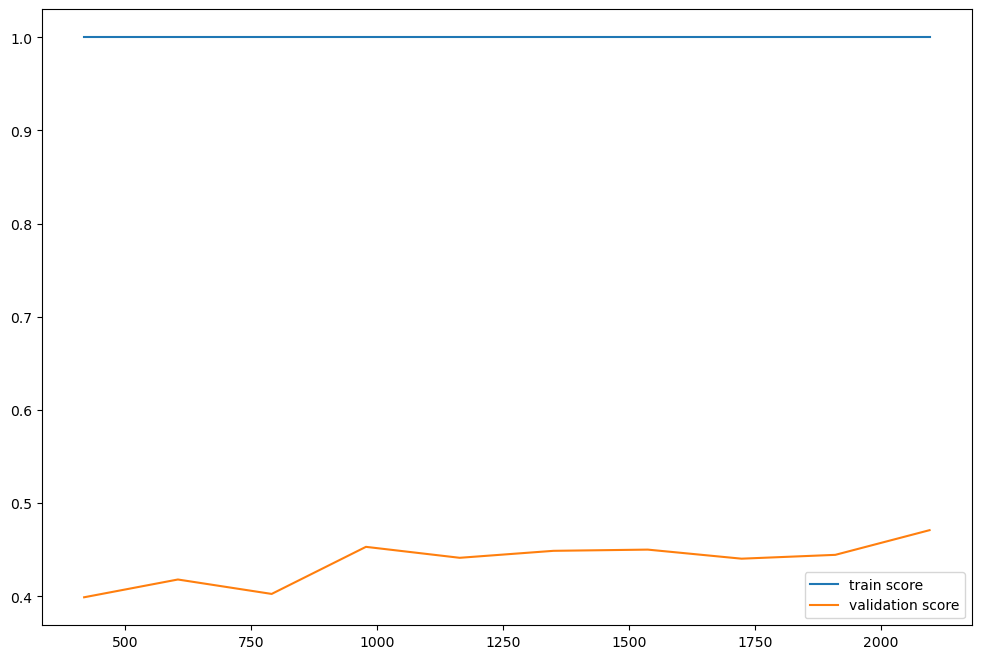

In [144]:
evaluation(RandomForest)

### Evaluation of all selected models with their learning curves

SVM
[[387  25]
 [181  63]]
              precision    recall  f1-score   support

         0.0       0.68      0.94      0.79       412
         1.0       0.72      0.26      0.38       244

    accuracy                           0.69       656
   macro avg       0.70      0.60      0.58       656
weighted avg       0.69      0.69      0.64       656



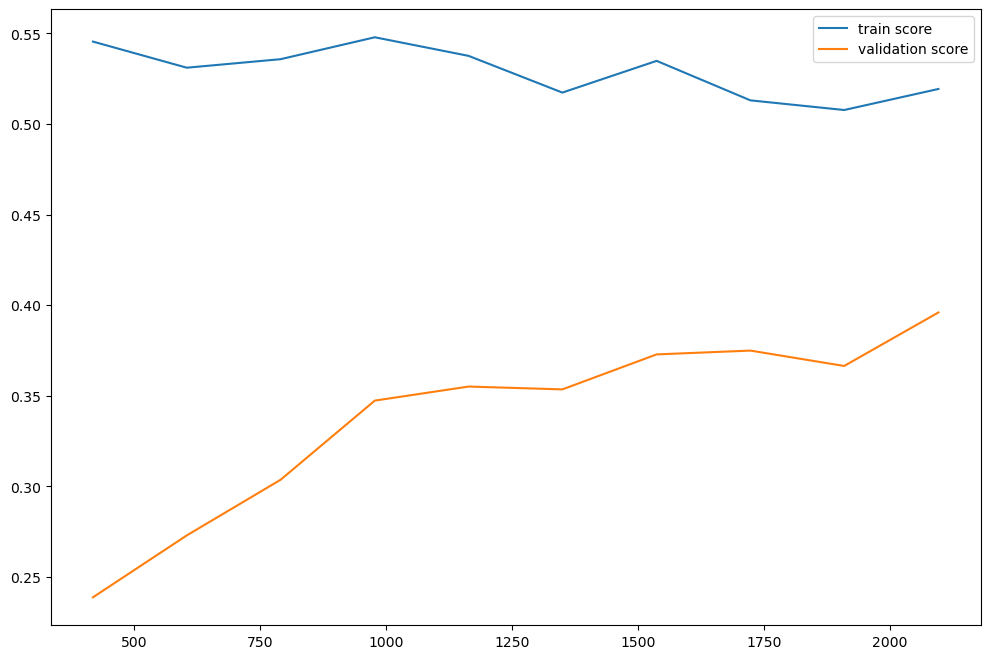

KNeighbors
[[313  99]
 [153  91]]
              precision    recall  f1-score   support

         0.0       0.67      0.76      0.71       412
         1.0       0.48      0.37      0.42       244

    accuracy                           0.62       656
   macro avg       0.58      0.57      0.57       656
weighted avg       0.60      0.62      0.60       656



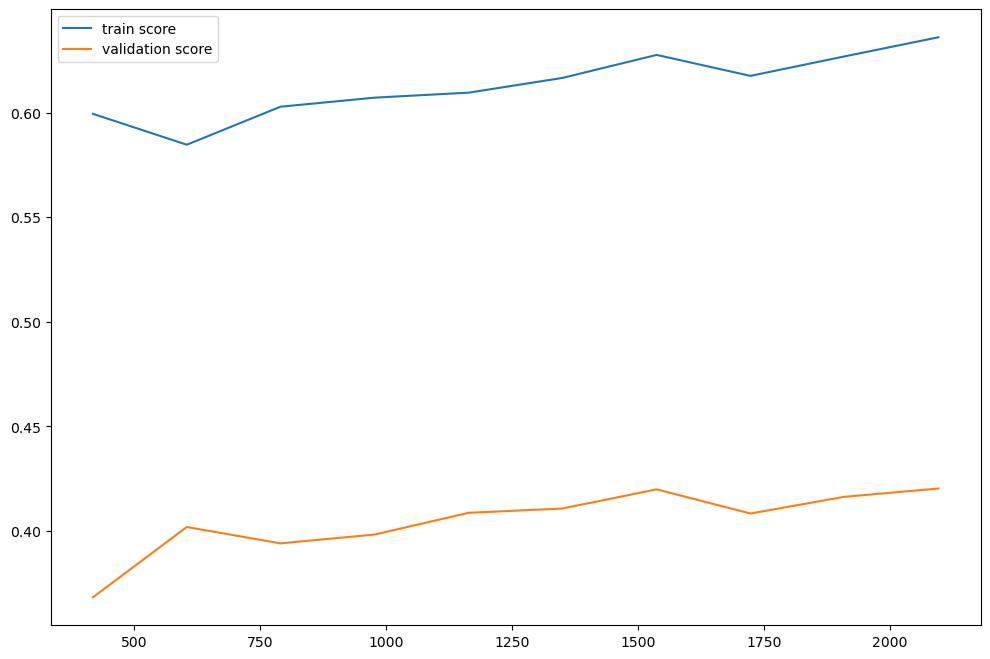

AdaBoost
[[349  63]
 [172  72]]
              precision    recall  f1-score   support

         0.0       0.67      0.85      0.75       412
         1.0       0.53      0.30      0.38       244

    accuracy                           0.64       656
   macro avg       0.60      0.57      0.56       656
weighted avg       0.62      0.64      0.61       656



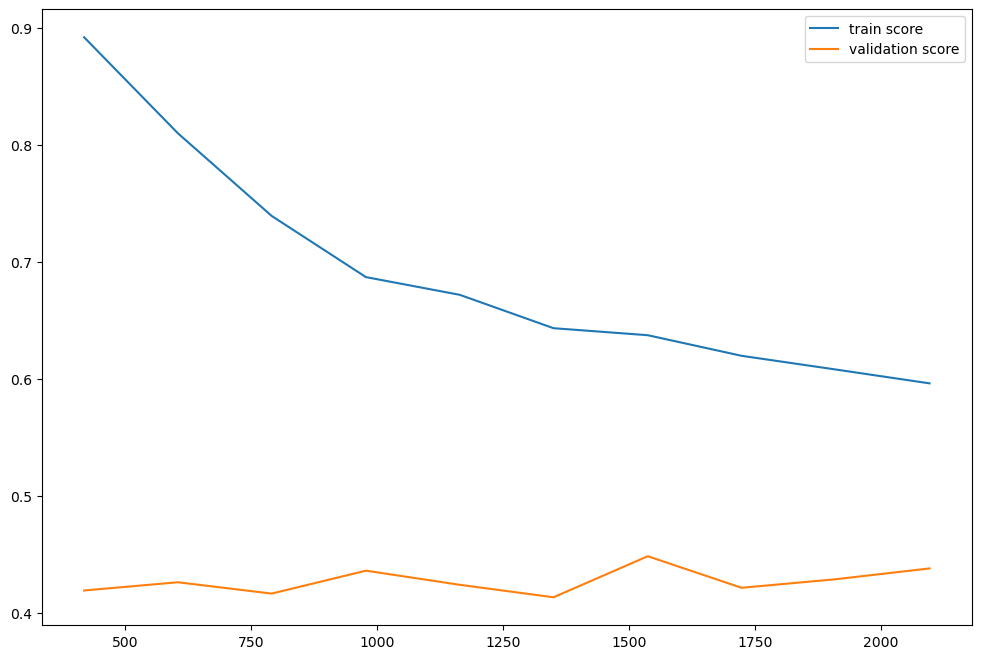

RandomForest
[[363  49]
 [152  92]]
              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78       412
         1.0       0.65      0.38      0.48       244

    accuracy                           0.69       656
   macro avg       0.68      0.63      0.63       656
weighted avg       0.69      0.69      0.67       656



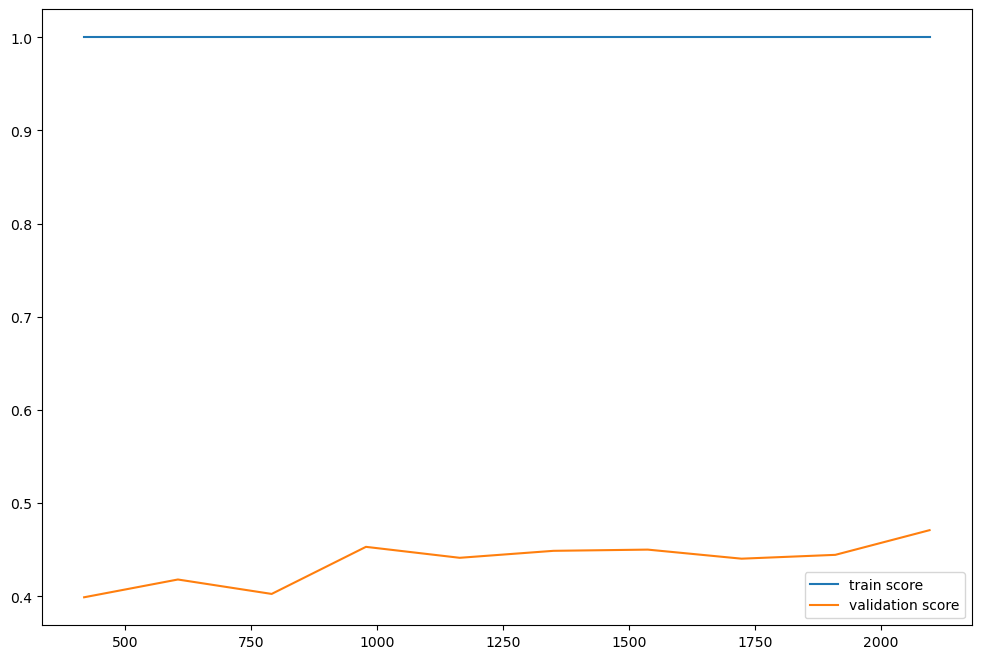

ExtraTrees
[[367  45]
 [163  81]]
              precision    recall  f1-score   support

         0.0       0.69      0.89      0.78       412
         1.0       0.64      0.33      0.44       244

    accuracy                           0.68       656
   macro avg       0.67      0.61      0.61       656
weighted avg       0.67      0.68      0.65       656



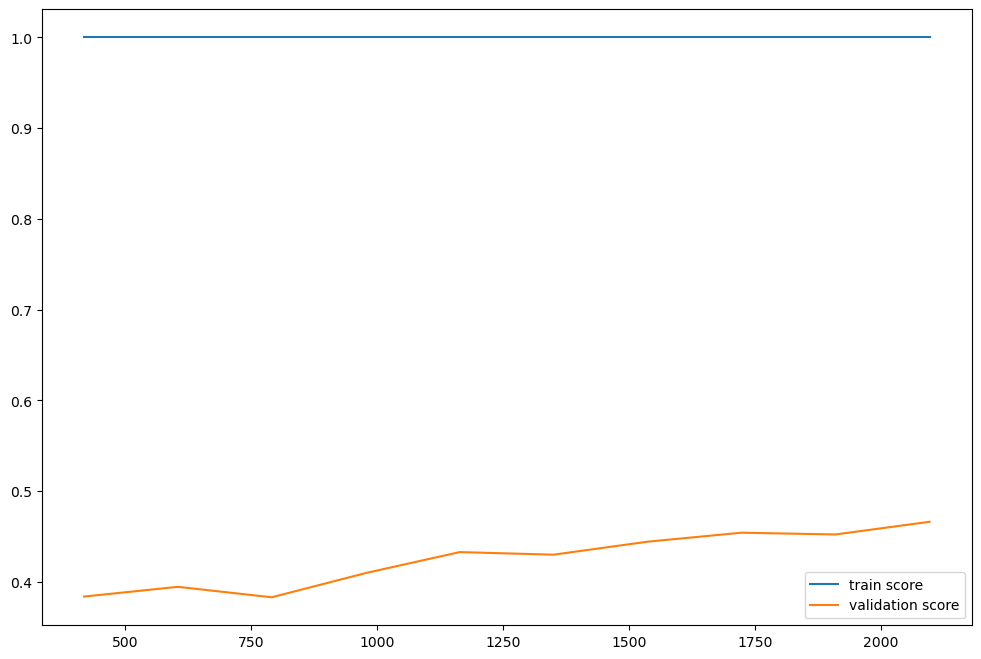

DecisionTree
[[259 153]
 [135 109]]
              precision    recall  f1-score   support

         0.0       0.66      0.63      0.64       412
         1.0       0.42      0.45      0.43       244

    accuracy                           0.56       656
   macro avg       0.54      0.54      0.54       656
weighted avg       0.57      0.56      0.56       656



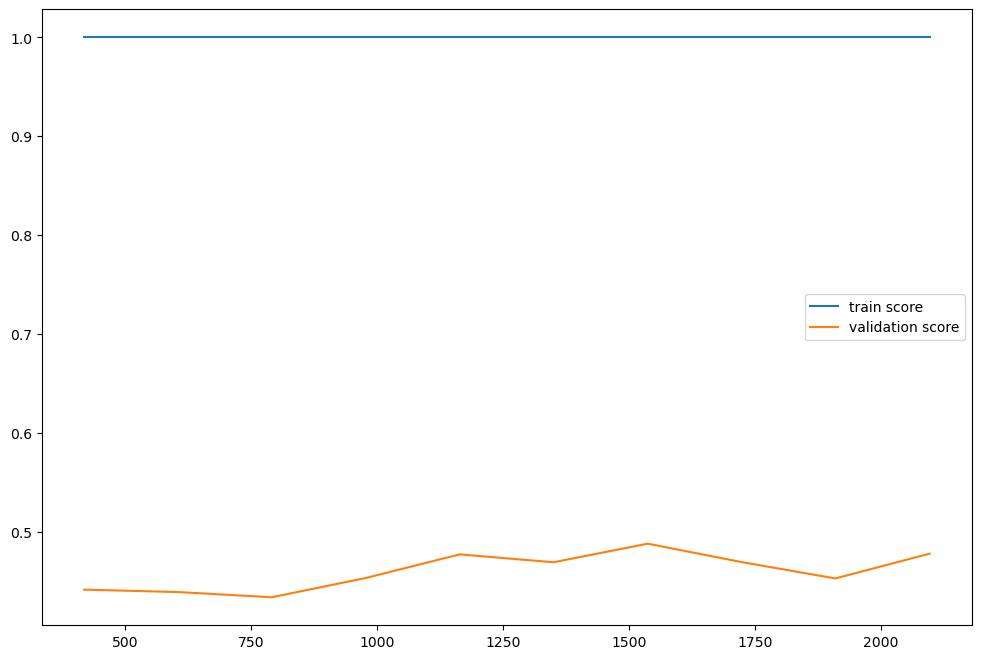

Bagging
[[354  58]
 [151  93]]
              precision    recall  f1-score   support

         0.0       0.70      0.86      0.77       412
         1.0       0.62      0.38      0.47       244

    accuracy                           0.68       656
   macro avg       0.66      0.62      0.62       656
weighted avg       0.67      0.68      0.66       656



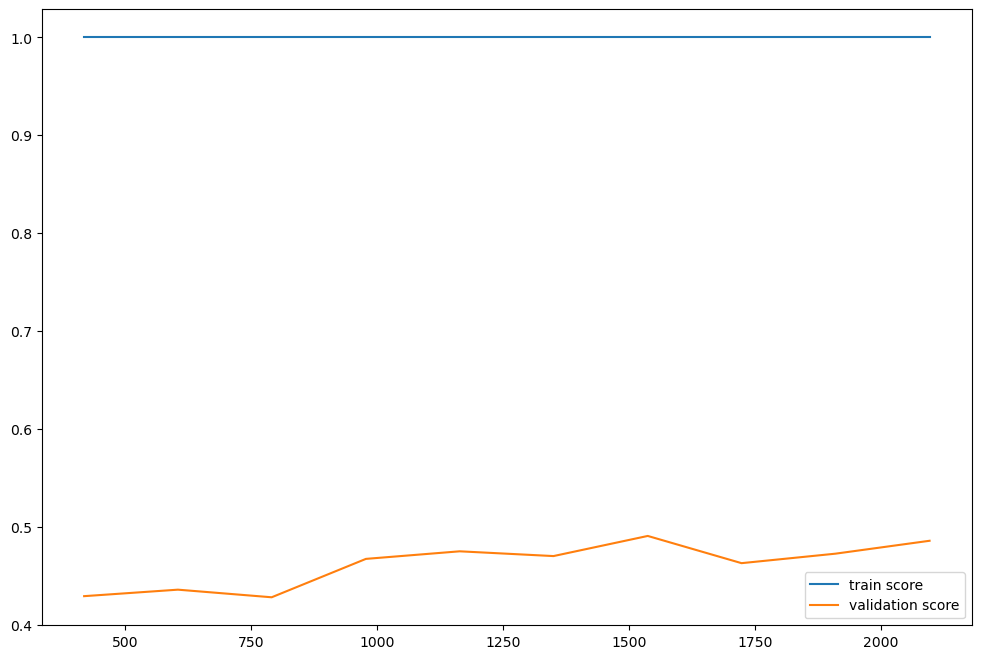

In [145]:
for name, model in list_of_models.items():
    print(name)
    evaluation(model)

### Optimization of the model which has the best score after evaluation

#### show all hyper-parameters of the model

In [146]:
import sklearn
sklearn.set_config(print_changed_only=False) 
print(RandomForest)

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('variancethreshold',
                                  VarianceThreshold(threshold=0.1)),
                                 ('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C'))],
                          verbose=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decreas

#### Optimization ef the model with GridSearchCV

In [147]:
hyper_params={'pipeline__polynomialfeatures__degree': [2,3,4],
              'randomforestclassifier__max_depth': [10, 20, 30],
              'randomforestclassifier__n_estimators': [100, 200, 300]}
model=GridSearchCV(RandomForest, hyper_params, scoring='f1', cv=5)
model.fit(X_train, y_train)
print("Best parameters : {}".format(model.best_params_))
print("Best score : {}".format(model.best_score_))
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters : {'pipeline__polynomialfeatures__degree': 4, 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 100}
Best score : 0.4823817632655357
              precision    recall  f1-score   support

         0.0       0.70      0.87      0.77       412
         1.0       0.62      0.36      0.45       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.61       656
weighted avg       0.67      0.68      0.65       656

